In [323]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics

In [4]:
#1.1 Know Your Data

In [5]:
#Q1 Printing first 5 lines of data frame

In [188]:
#creating data frame
def load_frame():
    csv = "./loan_data.csv"
    df = pd.read_csv(csv)
    return df

df = load_frame()
print(df.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [7]:
#Q2 getting count, std, mean, percentiles, min/max, of each column

In [8]:
count = df.count()
mean = df.mean(numeric_only=True)
std = df.std(numeric_only=True)
lower_percentile = df.quantile(q=0.25)
mid_percentile = df.quantile(q=0.5)
upper_percentile = df.quantile(q=0.75)
minimum = df.min()
maximum = df.max()

print("\nCount")
print(count)
print("\nMean")
print(mean)
print("\nStandard Deviation")
print(std)
print("\n25th Percentile")
print(lower_percentile)
print("\n50th Percentile")
print(mid_percentile)
print("\n75th Percentile")
print(upper_percentile)
print("\nMin")
print(minimum)
print("\nMax")
print(maximum)



Count
credit.policy        9577
purpose              9577
int.rate             9577
installment          9577
log.annual.inc       9577
dti                  9577
fico                 9577
days.with.cr.line    9577
revol.bal            9577
revol.util           9577
inq.last.6mths       9577
delinq.2yrs          9577
pub.rec              9577
not.fully.paid       9577
dtype: int64

Mean
credit.policy            0.805054
int.rate                 0.122638
installment            319.033619
log.annual.inc          10.932082
dti                     12.606295
fico                   710.844106
days.with.cr.line     4560.748482
revol.bal            16911.774773
revol.util              46.798171
inq.last.6mths           1.577007
delinq.2yrs              0.163726
pub.rec                  0.062128
not.fully.paid           0.159967
dtype: float64

Standard Deviation
credit.policy            0.396180
int.rate                 0.026848
installment            207.010102
log.annual.inc           0.6148

In [9]:
#Q3 Showcasing Breakdown of credit policy

In [186]:
#Create df where its all approved records
approved = df[df['credit.policy'] > 0]
approved

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1,home_improvement,0.1189,663.28,11.012050,2.89,742,3660.000000,6863,46.7,4,0,0,1
7706,1,small_business,0.1739,716.95,11.034890,13.51,697,4350.000000,7574,35.6,3,1,0,1
7707,1,all_other,0.1114,393.65,11.225243,7.82,737,3179.958333,10320,8.9,1,0,0,1
7708,1,home_improvement,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,1


In [187]:
#Create df where its all unapproved records
unapproved = df[df['credit.policy'] == 0]
unapproved

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,debt_consolidation,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1


In [11]:
#Q4 Histograms of approved and unapproved

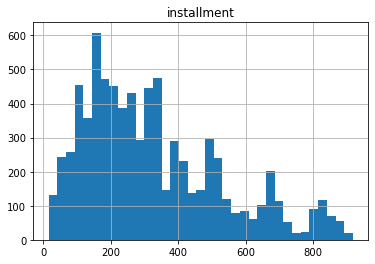

In [12]:
approvedHist = approved.hist(column='installment', bins=35)

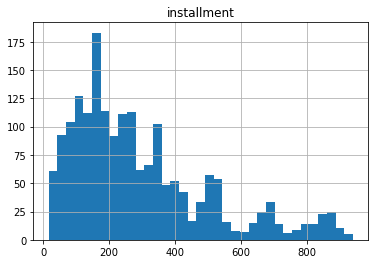

In [13]:
unapprovedHist = unapproved.hist(column='installment', bins=35)

In [14]:
#Q5 Boxplots of Fico Score for approved and unapproved

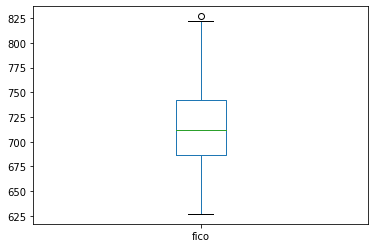

In [15]:
approvedFico = approved.boxplot(column='fico', grid=False)

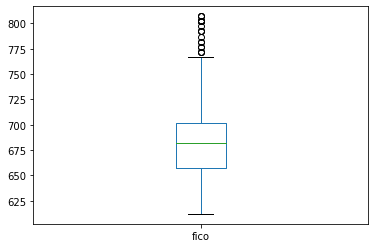

In [16]:
unapprovedFico = unapproved.boxplot(column='fico', grid=False)

In [17]:
#1.2.1 Data Preprocessing and Splitting

In [18]:
#Convert Categorical values into binary values in order for scikit learn to work with data

In [191]:
#Need to reload frame from csv, since if this is run more than once the purpose column would no long exist and create an error
df = load_frame()
df = pd.get_dummies(df, columns=['purpose'])

In [193]:
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0


In [21]:
#Split our data set into training and testing data

In [207]:
#Create a 70:30 split of the data fram passed into it
def split_data(df):
    #get how many rows are 70% of the data frame
    upper = math.ceil(0.70*len(df))
    #Permuation permutate (lendf) objects and returns an arrays of numbers from 0 - len(df) in random order. Use upper to then slice by how many rows u want
    rows = np.random.permutation(len(df))[:upper]
    #take the permutation of rows (position based) from our original datafram
    training_df = df.take(rows)

    #get the rows we didnt use from our original data frame
    rows = np.setdiff1d(df.index, training_df.index)
    #take those rows from our original data frame for our testing data frame
    testing_df = df.take(rows)
    
    #for readibility
    training_df = training_df.sort_index(axis = 0)
    
    return testing_df, training_df



In [208]:
#Split the data, run this once to keep consitency of our 2 data sets and what our models are trained on.
testing_df, training_df = split_data(df)

In [209]:
testing_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,0,1,0,0,0,0,0
11,1,0.1324,253.58,11.835009,9.16,662,4298.000000,5122,18.2,2,1,0,0,0,0,1,0,0,0,0
15,1,0.1103,327.53,10.738915,13.04,702,8159.958333,5394,53.4,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9569,0,0.1426,823.34,12.429216,3.62,722,3239.958333,33575,83.9,5,0,0,1,0,0,0,0,1,0,0
9570,0,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1,1,0,0,0,0,0,0
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0


In [210]:
training_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,0,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0,1,0,0,0,0,0,0
9568,0,0.1979,37.06,10.645425,22.17,667,5916.000000,28854,59.8,6,0,1,0,1,0,0,0,0,0,0
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0


In [24]:
#1.2.2 Training a Decision Tree

In [ ]:
#Creating the model

In [212]:
#Creates and trains 4 models on the dataframe and target array passed into it
def create_models(df, target):
    #Create tree models
    gini_model = DecisionTreeClassifier(criterion='gini')
    ig_model = DecisionTreeClassifier(criterion='entropy')

    #Create forest models
    gini_forest_model = RandomForestClassifier(15, criterion="gini", bootstrap=True, max_samples=1000)
    ig_forest_model = RandomForestClassifier(15, criterion="entropy", bootstrap=True, max_samples=1000)

    #Train Model on traininDF
    gini_model = gini_model.fit(df, target)
    ig_model = ig_model.fit(df, target)
    gini_forest_model = gini_forest_model.fit(df, target)
    ig_forest_model = ig_forest_model.fit(df, target)
    
    return gini_model, ig_model, gini_forest_model, ig_forest_model


In [222]:
#Splits the df into features and target
def get_features_target(df):

    #First collect all the features into a seperate dataframe, excluding the target feature
    features = [col for col in df.columns if col != 'not.fully.paid']
    features_df = df.loc[:,features]

    #collect the target column into a seperate dataframe
    target = df.loc[:,'not.fully.paid']
    
    return features_df, target

In [223]:
#Split our training data frame into features and target output
features_df, target = get_features_target(training_df)

In [215]:
#Create models
gini_model, ig_model, gini_forest_model, ig_forest_model = create_models(features_df, target)

[Text(167.4, 190.26, 'X[0] <= 0.5\ngini = 0.272\nsamples = 6704\nvalue = [5617, 1087]'),
 Text(83.7, 135.9, 'X[2] <= 164.825\ngini = 0.408\nsamples = 1308\nvalue = [935, 373]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 11.39\ngini = 0.34\nsamples = 387\nvalue = [303, 84]'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[18] <= 0.5\ngini = 0.431\nsamples = 921\nvalue = [632, 289]'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[1] <= 0.093\ngini = 0.23\nsamples = 5396\nvalue = [4682, 714]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 9.48\ngini = 0.101\nsamples = 1124\nvalue = [1064, 60]'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[2] <= 843.365\ngini = 0.259\nsamples =

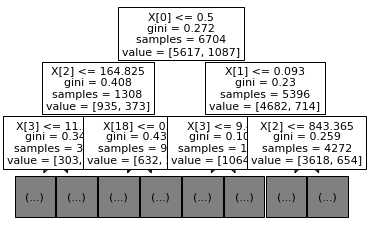

In [218]:
#Visualize gini tree model
tree.plot_tree(gini_model, max_depth=2, fontsize=11)

[Text(167.4, 190.26, 'X[0] <= 0.5\nentropy = 0.639\nsamples = 6704\nvalue = [5617, 1087]'),
 Text(83.7, 135.9, 'X[2] <= 164.825\nentropy = 0.862\nsamples = 1308\nvalue = [935, 373]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 11.39\nentropy = 0.755\nsamples = 387\nvalue = [303, 84]'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[18] <= 0.5\nentropy = 0.897\nsamples = 921\nvalue = [632, 289]'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[1] <= 0.093\nentropy = 0.564\nsamples = 5396\nvalue = [4682, 714]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 10.121\nentropy = 0.301\nsamples = 1124\nvalue = [1064, 60]'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[2] <= 843.365\ne

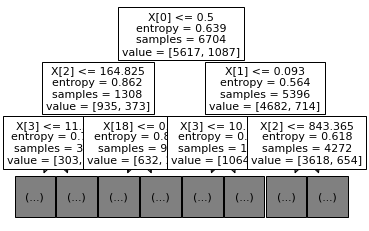

In [217]:
#Visualize ig tree model
tree.plot_tree(ig_model, max_depth=2, fontsize=11)

In [234]:
#Do 10 fold test on kfold of 2 models on a dataframe, and return the accuracies
def run_kfold(gini_model, ig_model, features_df, target):
    #cross val score function run all n folds on the data set passed in. It return an array of auc results of each validation set
    gini_kfold_results = cross_val_score(gini_model, 
                                   features_df, 
                                   target, 
                                   cv=10)

    ig_kfold_results = cross_val_score(ig_model, 
                                   features_df, 
                                   target, 
                                   cv=10)


    gini_accuracy = np.mean(gini_kfold_results)
    ig_accuracy = np.mean(ig_kfold_results)
    
    return gini_accuracy, ig_accuracy


In [ ]:
#Do 10 fold test on gini and ig tree models 

In [261]:
#Getting better performer on validation data, for Tree Models
gini_accuracy, ig_accuracy = run_kfold(gini_model, ig_model, features_df, target)

print(f'Gini Tree Model has an accuracy of {gini_accuracy:.2%}')
print(f'Information Gain Tree Model has an accuracy of {ig_accuracy:.2%}\n')

if(gini_accuracy > ig_accuracy):
    print('Gini Tree Model works best on validation data of Training Data.')
else:
    print('Information Gain Tree Model works best on validation data of Training Data.')

Gini Tree Model has an accuracy of 70.97%
Information Gain Tree Model has an accuracy of 70.52%

Gini Tree Model works best on validation data of Training Data.


In [272]:
#Getting better performer on validation data, for Forest Models
gini_accuracy, ig_accuracy = run_kfold(gini_forest_model, ig_forest_model, features_df, target)

print(f'Gini Forest Model has an accuracy of {gini_accuracy:.2%}')
print(f'Information Gain Forest Model has an accuracy of {ig_accuracy:.2%}\n')

if(gini_accuracy > ig_accuracy):
    print('Gini Forest Model works best on validation data of Training Data.')
else:
    print('Information Gain Forest Model works best on validation data of Training Data.')

Gini Forest Model has an accuracy of 78.97%
Information Gain Forest Model has an accuracy of 79.77%

Information Gain Forest Model works best on validation data of Training Data.


In [265]:
#1.3 Performance Evaluation and Analysis

In [275]:
#split testing set into X and y 
test_features_df, test_target = get_features_target(testing_df)

In [ ]:
#Retreive the precision recall and f1 measure of each model

In [300]:
#NOTE report are given as just 1 big string
gini_report = classification_report(test_target, gini_model.predict(test_featuresDF)) 
ig_report = classification_report(test_target, ig_model.predict(test_featuresDF)) 
ig_forest_report = classification_report(test_target, ig_forest_model.predict(test_featuresDF)) 
gini_forest_report = classification_report(test_target, gini_forest_model.predict(test_featuresDF)) 

In [320]:
print('----------------Gini Tree Model Report----------------')
print(gini_report)

print('\n----------Information Gain Tree Model Report----------')
print(ig_report)

print('\n---------------Gini Forest Model Report---------------')
print(gini_forest_report)

print('\n---------Information Gain Forest Model Report----------')
print(ig_forest_report)


----------------Gini Tree Model Report----------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2428
           1       0.21      0.24      0.22       445

    accuracy                           0.74      2873
   macro avg       0.53      0.53      0.53      2873
weighted avg       0.76      0.74      0.75      2873


----------Information Gain Tree Model Report----------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2428
           1       0.23      0.25      0.24       445

    accuracy                           0.75      2873
   macro avg       0.54      0.55      0.54      2873
weighted avg       0.76      0.75      0.76      2873


---------------Gini Forest Model Report---------------
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2428
           1       0.47      0.06      0.11       445

    accuracy   

In [ ]:
#Concluding Statements

In [322]:
"""
NOTE: Assuming 1 = paid back, and 0 = not paid back.

The forest models are 8-10% more accurate on predicting the correct value compared to the single tree models.
This is because the randomness of selecting different samples of our training data to create our forest model helps
to mitigate overfitting that happens when you use a single tree. However, all though forests have better accuracy, 
trees have a higher f1 score than the forests when predicting that a person will pay their loan back. This is 
because there is a much lower recall for the forests compared to the trees on that level.
"""

'\nNOTE: Assuming 1 = paid back, and 0 = not paid back.\n\nThe forest models are 8-10% more accurate on predicting the correct value compared to the single tree models.\nThis is because the randomness of selecting different samples of our training data to create our forest model helps\nto mitigate overfitting that happens when you use a single tree. However, all though forests have better accuracy, \ntrees have a higher f1 score than the forests when predicting that a person will pay their loan back. This is \nbecause there is a much lower recall for the forests compared to the trees on that level.\n'